In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from collections import deque

In [2]:
main_dataframe = pd.DataFrame()

In [3]:
currencies = ['BCH-USD', 'BTC-USD', 'ETH-USD', 'LTC-USD']
for c in currencies:
    dataset = 'data/' + c + '.csv'
    df = pd.read_csv(dataset, names=['time', 'low', 'high', 'open', 'close', 'volume'])
    df.rename(columns={'close': c + '_close', 'volume': c + '_volume'}, inplace=True)
    df.set_index('time', inplace=True)
    df = df[[ c + '_close', c + '_volume']]
    if len(main_dataframe) == 0:
        main_dataframe = df
    else:
        main_dataframe = main_dataframe.join(df)

In [4]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume
time,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,NaN,NaN,96.580002,9.647200
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978


In [5]:
main_dataframe.isnull().sum()

BCH-USD_close        0
BCH-USD_volume       0
BTC-USD_close     5122
BTC-USD_volume    5122
ETH-USD_close      195
ETH-USD_volume     195
LTC-USD_close      836
LTC-USD_volume     836
dtype: int64

In [6]:
main_dataframe.fillna(method='ffill', inplace=True)

In [7]:
main_dataframe.isnull().sum()

BCH-USD_close     0
BCH-USD_volume    0
BTC-USD_close     0
BTC-USD_volume    0
ETH-USD_close     1
ETH-USD_volume    1
LTC-USD_close     0
LTC-USD_volume    0
dtype: int64

In [8]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume
time,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,NaN,NaN,96.580002,9.647200
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978


In [9]:
main_dataframe.fillna(method='bfill', inplace=True)

In [10]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume
time,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,486.01001,26.019083,96.580002,9.647200
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978


In [11]:
main_dataframe.isnull().sum()

BCH-USD_close     0
BCH-USD_volume    0
BTC-USD_close     0
BTC-USD_volume    0
ETH-USD_close     0
ETH-USD_volume    0
LTC-USD_close     0
LTC-USD_volume    0
dtype: int64

In [12]:
main_dataframe['future'] = main_dataframe['LTC-USD_close'].shift(-3)

In [13]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume,future
time,,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,486.01001,26.019083,96.580002,9.647200,96.500000
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024,96.389999
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799,96.519997
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067,96.440002
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978,96.470001


In [14]:
main_dataframe.tail()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume,future
time,,,,,,,,,
1535215020,531.479980,0.016868,6714.52002,1.002652,279.359985,8.790519,58.009998,7.301921,58.080002
1535215080,531.469971,0.013854,6714.52002,1.021925,279.369995,1.311763,58.020000,23.802017,58.090000
1535215140,531.479980,0.016900,6715.00000,3.645508,279.660004,11.752819,58.020000,6.953497,NaN
1535215200,531.479980,0.299520,6715.00000,0.513560,279.649994,8.351710,58.080002,202.403183,NaN
1535215260,531.630005,3.528913,6715.00000,0.513560,279.649994,10.511729,58.090000,160.602554,NaN


In [15]:
def compare(current, future):
    if future > current:
        return 1
    else:
        return 0
main_dataframe['target'] = list(map(compare, main_dataframe['LTC-USD_close'], main_dataframe['future']))

In [16]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume,future,target
time,,,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,486.01001,26.019083,96.580002,9.647200,96.500000,0
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024,96.389999,0
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799,96.519997,0
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067,96.440002,0
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978,96.470001,1


In [17]:
times = sorted(main_dataframe.index.values)

In [18]:
len(times)

92225

In [19]:
int(0.1 * len(times))

9222

In [20]:
last_10pct = sorted(main_dataframe.index.values)[-int(0.1 * len(times))]

In [21]:
last_10pct

1534556340

In [22]:
main_dataframe_train = main_dataframe[(main_dataframe.index < last_10pct)]
main_dataframe_test = main_dataframe[(main_dataframe.index >= last_10pct)]

In [23]:
len(main_dataframe_train)

83003

In [24]:
len(main_dataframe_test)

9222

In [25]:
main_dataframe['BTC-USD_close']

time
1528968660    6489.549805
1528968720    6487.379883
1528968780    6479.410156
1528968840    6479.410156
1528968900    6479.979980
                 ...     
1535215020    6714.520020
1535215080    6714.520020
1535215140    6715.000000
1535215200    6715.000000
1535215260    6715.000000
Name: BTC-USD_close, Length: 92225, dtype: float64

In [26]:
main_dataframe['BTC-USD_close'].pct_change()

time
1528968660         NaN
1528968720   -0.000334
1528968780   -0.001228
1528968840    0.000000
1528968900    0.000088
                ...   
1535215020    0.000206
1535215080    0.000000
1535215140    0.000071
1535215200    0.000000
1535215260    0.000000
Name: BTC-USD_close, Length: 92225, dtype: float64

In [41]:
def preprocess_main_dataframe(df):
    df = df.drop('future', axis=1)
    for col in df.columns:
        if col != 'target':
            df[col] = df[col].pct_change()
            df.dropna(inplace=True)
            df[col] = preprocessing.scale(df[col].values)
    df.dropna(inplace=True)
    sequences = []
    prev_days = deque(maxlen=30)
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days) == 30:
            sequences.append([np.array(prev_days), i[-1]])
    random.shuffle(sequences)
    buys = []
    sells = []
    for seq, target in sequences:
        if target == 0:
            sells.append([seq, target])
        elif target == 1:
            buys.append([seq, target])
    random.shuffle(buys)
    random.shuffle(sells)
    lower = min(len(buys), len(sells))
    buys = buys[:lower]
    sells = sells[:lower]
    sequential_data = buys + sells
    random.shuffle(sequential_data)
    X, y = [], []
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

In [42]:
train_X, train_y = preprocess_main_dataframe(main_dataframe_train)

In [29]:
len(main_dataframe_train)

83003

In [30]:
train_X.shape

(71030, 30, 8)

In [31]:
train_y.shape

(71030,)

In [32]:
np.unique(train_y, return_counts=True)

(array([0., 1.]), array([35515, 35515], dtype=int64))

In [33]:
test_X, test_y = preprocess_main_dataframe(main_dataframe_test)

In [34]:
test_X.shape

(7840, 30, 8)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

In [36]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1:])))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
history = model.fit(train_X, train_y, batch_size=100, epochs=100, validation_data=(test_X, test_y))

Epoch 1/100
711/711 [==============================] - 15s 18ms/step - loss: 0.6839 - accuracy: 0.5551 - val_loss: 0.6783 - val_accuracy: 0.5666
Epoch 2/100
711/711 [==============================] - 12s 16ms/step - loss: 0.6800 - accuracy: 0.5655 - val_loss: 0.6781 - val_accuracy: 0.5643
Epoch 3/100
711/711 [==============================] - 11s 16ms/step - loss: 0.6784 - accuracy: 0.5674 - val_loss: 0.6811 - val_accuracy: 0.5705
Epoch 4/100
711/711 [==============================] - 11s 16ms/step - loss: 0.6763 - accuracy: 0.5745 - val_loss: 0.6779 - val_accuracy: 0.5654
Epoch 5/100
711/711 [==============================] - 11s 15ms/step - loss: 0.6739 - accuracy: 0.5780 - val_loss: 0.6779 - val_accuracy: 0.5672
Epoch 6/100
711/711 [==============================] - 11s 16ms/step - loss: 0.6716 - accuracy: 0.5811 - val_loss: 0.6823 - val_accuracy: 0.5668
Epoch 7/100
711/711 [==============================] - 11s 15ms/step - loss: 0.6691 - accuracy: 0.5869 - val_loss: 0.6850 - val_ac

711/711 [==============================] - 16s 22ms/step - loss: 0.4236 - accuracy: 0.7846 - val_loss: 1.4589 - val_accuracy: 0.5332
Epoch 58/100
711/711 [==============================] - 15s 21ms/step - loss: 0.4223 - accuracy: 0.7857 - val_loss: 1.4616 - val_accuracy: 0.5283
Epoch 59/100
711/711 [==============================] - 15s 21ms/step - loss: 0.4175 - accuracy: 0.7893 - val_loss: 1.4594 - val_accuracy: 0.5278
Epoch 60/100
711/711 [==============================] - 15s 21ms/step - loss: 0.4126 - accuracy: 0.7921 - val_loss: 1.5384 - val_accuracy: 0.5227
Epoch 61/100
711/711 [==============================] - 15s 21ms/step - loss: 0.4115 - accuracy: 0.7926 - val_loss: 1.5333 - val_accuracy: 0.5310
Epoch 62/100
711/711 [==============================] - 14s 20ms/step - loss: 0.4127 - accuracy: 0.7919 - val_loss: 1.5550 - val_accuracy: 0.5228
Epoch 63/100
711/711 [==============================] - 15s 21ms/step - loss: 0.4093 - accuracy: 0.7936 - val_loss: 1.6154 - val_accuracy

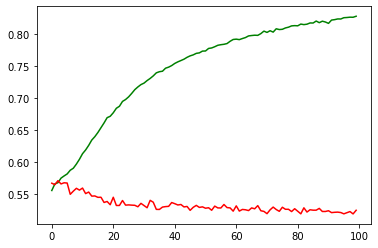

In [40]:
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='red')